# Tutorial 11: Deriving fields and values

> Interactive online tutorial:
> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ubermag/oommfc/master?filepath=docs%2Fipynb%2Findex.ipynb)

In this tutorial, we show how derived fields and values can be computed afetr the micromagnetic system is defined.

## Simulation

First of all, as usual, we import `oommfc` and `discretisedfield`.

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
%matplotlib inline

We define the cube mesh with edge length $10 \,\text{nm}$ and cell discretisation edge $1 \,\text{nm}$.

In [2]:
mesh = df.Mesh(p1=(0, 0, 0), p2=(10e-9, 10e-9, 10e-9), cell=(1e-9, 1e-9, 1e-9))
mesh.k3d()

Output()

Now we define the system object and its Hamiltonian.

In [3]:
system = mm.System(name='system')

A = 1e-11
H = (0.1/mm.consts.mu0, 0, 0)
K = 1e3
u = (1, 1, 1)
system.energy = mm.Exchange(A=A) + \
                mm.Demag() + \
                mm.Zeeman(H=H) + \
                mm.UniaxialAnisotropy(K=K, u=u)

We will now intialise the system in $(0, 0, 1)$ direction and relax the magnetisation.

In [4]:
Ms = 8e5
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

## Effective field

Total effective field is:

2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)


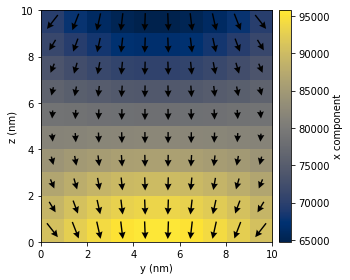

In [5]:
oc.compute(system.energy, 'effective_field', system).plane('x').mpl()

Whereas, the individual exchange effective field is:

In [6]:
Hex_eff = oc.compute(system.energy.exchange, 'effective_field', system)

2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)


Because we initialised the system with the uniform state, we expect this effective field to be zero.

In [7]:
Hex_eff.average

(0.0, 0.0, 0.0)

## Relax the system

In [8]:
md = oc.MinDriver()
md.drive(system)

2020/03/06 15:14: Running OOMMF (system.mif) ... (1.3 s)


Compute the energy (and demonstrate that the energy decreased) and plot its magnetisation:

2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)
The system's energy is 5.35285533145e-20 J.


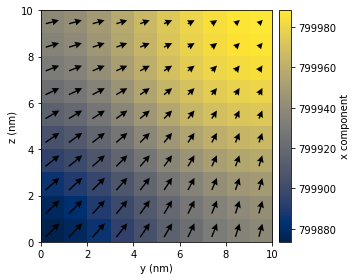

In [9]:
E = oc.compute(system.energy, 'energy', system)
print("The system's energy is {} J.".format(E))

system.m.plane('x').mpl()

## Computing energies of individual term

For instance, the exchange energy is:

In [10]:
oc.compute(system.energy.exchange, 'energy', system)

2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)


1.12170190429e-21

We can also chack the sum of all individual energy terms and check if it the same as the total energy.

In [11]:
total_energy = 0
for term in system.energy:
    total_energy += oc.compute(term, 'energy', system)
    
print("The sum of energy terms is {} J.".format(total_energy))
print("The system's energy is {} J.".format(oc.compute(system.energy, 'energy', system)))

2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)
2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)
2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)
2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)
The sum of energy terms is 5.352855331428199e-20 J.
2020/03/06 15:14: Running OOMMF (system.mif) ... (1.1 s)
The system's energy is 5.35285533145e-20 J.


In [12]:
md.delete(system)